In [1]:
!ls Data/

flowers.csv     google_data.txt ny_temps.txt    stocks.png      yahoo_data.txt


# New York Temperature, Google, and Yahoo!

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!head Data/ny_temps.txt

Modified Julian Date	Max Temperature
48988	53
49019	38
49047	31
49078	66
49108	75
49139	65
49169	79
49200	82
49231	83


In [5]:
#------- loading data ---------#
ny_temps = np.loadtxt("Data/ny_temps.txt", skiprows=1, 
                     dtype=np.dtype([("date", "i8"), ("max_temp", "i8")]))

In [8]:
type(ny_temps)

numpy.ndarray

In [10]:
ny_temps.shape

(202,)

In [12]:
ny_temps[0]

(48988, 53)

In [13]:
!head Data/yahoo_data.txt

Modified Julian Date	Stock Value
55463	14.5
55462	14.17
55461	14.04
55460	14.18
55459	13.86
55456	13.89
55455	14.19
55454	14.27
55453	13.63


In [14]:
# load yahoo stock data
yahoo_data = np.loadtxt(
    "Data/yahoo_data.txt", 
    skiprows=1, 
    dtype=np.dtype([("date", "i8"), ("stock_value", "f8")]))

In [15]:
yahoo_data["date"]

array([55463, 55462, 55461, ..., 50189, 50188, 50185])

In [16]:
# load google stock data
google_data = np.loadtxt(
    "Data/google_data.txt",
    skiprows=1,
    dtype=np.dtype([("date", "i8"), ("stock_value", "f8")]))

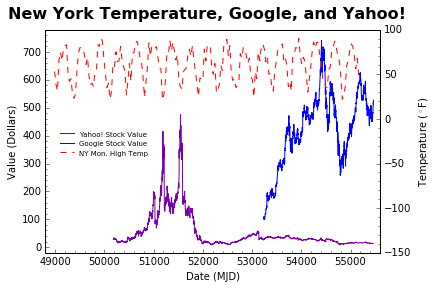

In [20]:
# create figure and first axis
fig, ax1 = plt.subplots()

# plot stock data
yahoo, = ax1.plot(
    yahoo_data["date"], yahoo_data["stock_value"], 
    #yahoo_data[0], yahoo_data[1], 
    #linestyle="-", color="#7700AA", label="Yahoo! Stock Value")
    linestyle="-", color="#7700AA", label="Yahoo! Stock Value")
google, = ax1.plot(
    google_data["date"], google_data["stock_value"], 
    linestyle="-", color="#0000FF", label="Google Stock Value")

# set axis limits, ticks, labels
ax1.set_ylim(-20, 780)
ax1.minorticks_on()
ax1.xaxis.set_ticks_position("bottom")
ax1.set_xlabel("Date (MJD)")
ax1.set_ylabel("Value (Dollars)")

# create a second axis on top of the first axis
ax2 = ax1.twinx()
# plot the temperature data
temps, = ax2.plot(
    ny_temps["date"], ny_temps["max_temp"], 
    linestyle="--", color="#FF0000", label="NY Mon. High Temp")

# set axis limits, ticks, label
ax2.set_ylim(-150, 100)
ax2.minorticks_on()
ax2.set_ylabel("Temperature ($^\circ$F)")

# set x limit -- we have to do this after all the plotting on both 
# axes so it doesn't change
ax1.set_xlim(48800, 55600)

# plot the legend
plt.figlegend(
    [yahoo, google, temps], 
    ["Yahoo! Stock Value", "Google Stock Value", "NY Mon. High Temp"], 
    [0.13, 0.45], fontsize=7, frameon=False, numpoints=1)
    
# plot the title
fig.suptitle("New York Temperature, Google, and Yahoo!", 
             fontsize=16, fontweight="bold")

In [21]:
# ----------------- Section 3: Brusher.py -----------------------#

In [22]:
%matplotlib osx

In [24]:
import matplotlib.pyplot as plt
import sys
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [26]:
!ls

Data            Homework3.ipynb brusher.py


In [27]:
!head Data/flowers.csv

sepal length,sepal width,petal length,petal width,species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [29]:
# load the flowers dataset
flowers = pd.read_table("Data/flowers.csv", sep=",").set_index("species")
flowers # (150, 4)

,sepal length,sepal width,petal length,petal width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
setosa,4.6,3.4,1.4,0.3
setosa,5.0,3.4,1.5,0.2
setosa,4.4,2.9,1.4,0.2


In [34]:
class Brusher(object):
    #########################################
    #----------- init function ------------ #
    #########################################
    def __init__(self, data, colors):
        """ The following function initializes the brusher plots
        Parameters:
        data: pd.DataFrame - figure will have NxN subplots where N
                                is the number of features/columns 
        colors: np.ndarray - the colors group each row into categories 
                                accordingly
        Output: A figure which applies brushing 
                to plot many pairs of parameters 
                of a dataset in many subplots
        """
        self.data = data
        self.colors = colors
        
        # -------- Create the figure and axes ------------ #
        self.ndim = self.data.shape[1] # No. of features
        self.fig, self.axes = plt.subplots(self.ndim, self.ndim)
        
        # -------- Initialize Object's variables --------- #
        self.loc0 = None
        self.loc1 = None
        self.xy0 = None
        self.xy1 = None
        self.ax0 = None
        self.rect = None 
        self.ax_dict = {} # dictionary to store the axis keys
        self.ax_data = {} # dictionary to store the axis data
        
        for x, xstat in enumerate(self.data.columns):
            for y, ystat in enumerate(self.data.columns):
                # ------  Matching Axis and Column Names ------ #
                ax = self.axes[y, x]
                self.ax_dict[str(ax)] = (xstat, ystat)
                self.ax_dict[x, y] = ax.scatter(self.data[xstat], 
                                                self.data[ystat])
                # ---------- xlim, ylim, and ticks ---------- #
                ax.set_xlim(self.data[xstat].min(), self.data[xstat].max())
                ax.set_ylim(self.data[ystat].min(), self.data[ystat].max())
                ax.xaxis.set_ticks([])
                ax.yaxis.set_ticks([])
                
                # ---------- Lables on Diagonal Plots -------- #
                if xstat == ystat: ax.text(0.1, 0.85, xstat, 
                                           transform = ax.transAxes)
                    
        # --------------- Setup Colors of data ---------------- #
        self.update_colors()
        
        # --------------- Setup Figure Sizes ------------------ #
        self.fig.set_figwidth(10)
        self.fig.set_figheight(10)
        
        # --------------- Draw figures ----------------- #
        self.fig.se
        
        

4